In [342]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import gaussian_kde

In [343]:
# Set display options to show all columns
pd.set_option('display.max_columns', None)

In [344]:
PATH = os.getcwd()

In [345]:
train_A = pd.read_csv(f'{PATH}/data/train/TRAIN_A.csv')
train_B = pd.read_csv(f'{PATH}/data/train/TRAIN_B.csv')

In [346]:
train_A['timestamp'] = pd.to_datetime(train_A['timestamp'], format='%y/%m/%d %H:%M')
train_B['timestamp'] = pd.to_datetime(train_B['timestamp'], format='%y/%m/%d %H:%M')

In [347]:
train_A[train_A['anomaly']==1].sample(n=5)

,timestamp,Q1,Q2,Q3,Q4,Q5,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,M13,M14,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,anomaly,P1_flag,P2_flag,P3_flag,P4_flag,P5_flag,P6_flag,P7_flag,P8_flag,P9_flag,P10_flag,P11_flag,P12_flag,P13_flag,P14_flag,P15_flag,P16_flag,P17_flag,P18_flag,P19_flag,P20_flag,P21_flag,P22_flag,P23_flag,P24_flag,P25_flag,P26_flag
44088,2024-06-26 14:48:00,18280,32784.001,42356.001,7697,95535,0,0,0,1,0,0,0,1,1,0,1,1,0,1,3.2335,3.1401,0.7041,0.6722,1.0397,1.0462,3.7475,0.0188,0.0159,5.4506,5.5069,6.0759,6.0591,6.0994,2.9262,3.0825,3.3075,2.2387,2.2075,2.6700,2.7225,2.7287,2.7362,2.4725,2.4037,2.3606,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44075,2024-06-26 14:35:00,17960,32995.000,41516.001,7461,95772,0,0,0,1,0,0,0,1,1,0,1,1,0,1,3.2280,3.1456,0.6947,0.6834,1.0359,1.0566,3.7500,0.0225,0.0113,5.4722,5.5050,6.0722,6.0637,6.0928,2.9813,3.0412,3.3012,2.2150,2.1675,2.6825,2.7338,2.7413,2.7338,2.4944,2.4100,2.3844,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44081,2024-06-26 14:41:00,17740,33151.001,41912.002,7416,95131,0,0,0,1,0,0,0,1,1,0,1,1,0,1,3.2280,3.1456,0.6825,0.6862,1.0341,1.0444,3.7462,0.0291,0.0047,5.4722,5.4984,6.0872,6.0797,6.0994,2.9488,3.0687,3.3125,2.2188,2.2050,2.7025,2.7350,2.7600,2.7625,2.4900,2.4150,2.3575,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44086,2024-06-26 14:46:00,17880,33070.000,41762.002,7687,95209,0,0,0,1,0,0,0,1,1,0,1,1,0,1,3.2225,3.1676,0.6947,0.6872,1.0369,1.0678,3.7425,0.0225,0.0150,5.4703,5.5003,6.0825,6.0778,6.0881,2.9362,3.1037,3.3163,2.2150,2.1937,2.6813,2.7213,2.7113,2.7225,2.4887,2.4188,2.3581,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
44084,2024-06-26 14:44:00,18080,33447.000,42921.001,7639,94904,0,0,0,1,0,0,0,1,1,0,1,1,0,1,3.2280,3.1456,0.6909,0.6881,1.0266,1.0416,3.7500,0.0188,0.0328,5.4609,5.5256,6.0788,6.0581,6.0816,2.9437,3.0938,3.2950,2.1975,2.1788,2.6762,2.7137,2.7275,2.7338,2.4900,2.4113,2.3588,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [348]:
train_A.describe()

,timestamp,Q1,Q2,Q3,Q4,Q5,M1,M2,M3,M4,M5,M6,M7,M8,M9,M10,M11,M12,M13,M14,P1,P2,P3,P4,P5,P6,P7,P8,P9,P10,P11,P12,P13,P14,P15,P16,P17,P18,P19,P20,P21,P22,P23,P24,P25,P26,anomaly,P1_flag,P2_flag,P3_flag,P4_flag,P5_flag,P6_flag,P7_flag,P8_flag,P9_flag,P10_flag,P11_flag,P12_flag,P13_flag,P14_flag,P15_flag,P16_flag,P17_flag,P18_flag,P19_flag,P20_flag,P21_flag,P22_flag,P23_flag,P24_flag,P25_flag,P26_flag
count,44101,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.0,44101.0,44101.0,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.0,44101.000000,44101.000000,44101.0,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.000000,44101.0,44101.0,44101.0,44101.0,44101.0,44101.0,44101.0,44101.000000,44101.000000,44101.0,44101.0,44101.0,44101.0,44101.0,44101.0,44101.0,44101.0,44101.0,44101.0,44101.0,44101.0,44101.0,44101.0,44101.0,44101.0,44101.0
mean,2024-06-11 07:30:00,21642.090882,38889.877793,26553.822750,4713.110360,91646.376001,0.0,0.0,0.0,0.999977,0.242988,0.619442,0.495907,0.769915,0.877667,0.0,0.982767,0.392826,0.0,0.432598,3.299315,3.211265,0.770069,0.753334,1.036325,1.036782,3.901061,0.130456,0.135996,5.605255,5.653420,6.224026,6.222726,6.243156,3.068573,3.195060,3.379153,2.320475,2.305669,2.823816,2.879957,2.885323,2.893190,2.685291,2.601296,2.558205,0.000680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000680,0.000680,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,2024-05-27 00:00:00,15080.000000,15641.000000,0.000000,-3228.000000,73424.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,3.063200,2.986300,0.542800,0.542800,0.905600,0.878400,3.736200,0.000000,0.000000,5.381200,5.412200,5.991600,5.982200,6.000000,2.687500,2.810000,3.052500,1.961200,1.936200,2.460000,2.520000,2.516200,2.523800,2.301200,2.216200,2.165000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,2024-06-03 15:45:00,17250.000000,32873.000000,17435.000000,3273.000000,89417.000000,0.0,0.0,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.0,1.000000,0.000000,0.0,0.000000,3.266500,3.167600,0.736900,0.719100,0.997500,0.998400,3.848800,0.077800,0.078700,5.537800,5.581900,6.154700,6.152800,6.170600,2.980000,3.096300,3.291200,2.218800,2.198800,2.721300,2.777500,2.781200,2.786300,2.562500,2.472500,2.428800,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,2024-06-11 07:30:00,17620.000000,36766.001000,24848.000000,4849.000000,92719.000000,0.0,0.0,0.0,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.0,1.000000,0.000000,0.0,0.000000,3.294000,3.206000,0.766900,0.754700,1.034100,1.039700,3.893700,0.119100,0.130300,5.595000,5.636300,6.211900,6.210900,6.225900,3.040000,3.180000,3.377500,2.302500,2.290000,2.801200,2.858800,2.865000,2.873700,2.659400,2.574400,2.534400,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,2024-06-18 23:15:00,18340.000000,48387.002000,33600.000000,6367.000000,94841.000000,0.0,0.0,0.0,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,3.326900,3.244500,0.796900,0.779100,1.069700,1.067800,3.947500,0.169700,0.179100,5.669100,5.712200,6.293400,6.288800,6.303800,3.132500,3.281200,3.468800,2.410000,2.397500,2.903700,2.967500,2.972500,2.986200,2.783100,2.702500,2.656200,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,2024-06-26 15:00:00,37690.000000,54093.999000,42921.001000,12955

In [349]:
train_A.isna().sum()

timestamp    0
Q1           0
Q2           0
Q3           0
Q4           0
            ..
P22_flag     0
P23_flag     0
P24_flag     0
P25_flag     0
P26_flag     0
Length: 73, dtype: int64

Validation Passed: 'anomaly' flag is set correctly based on sensor flags.


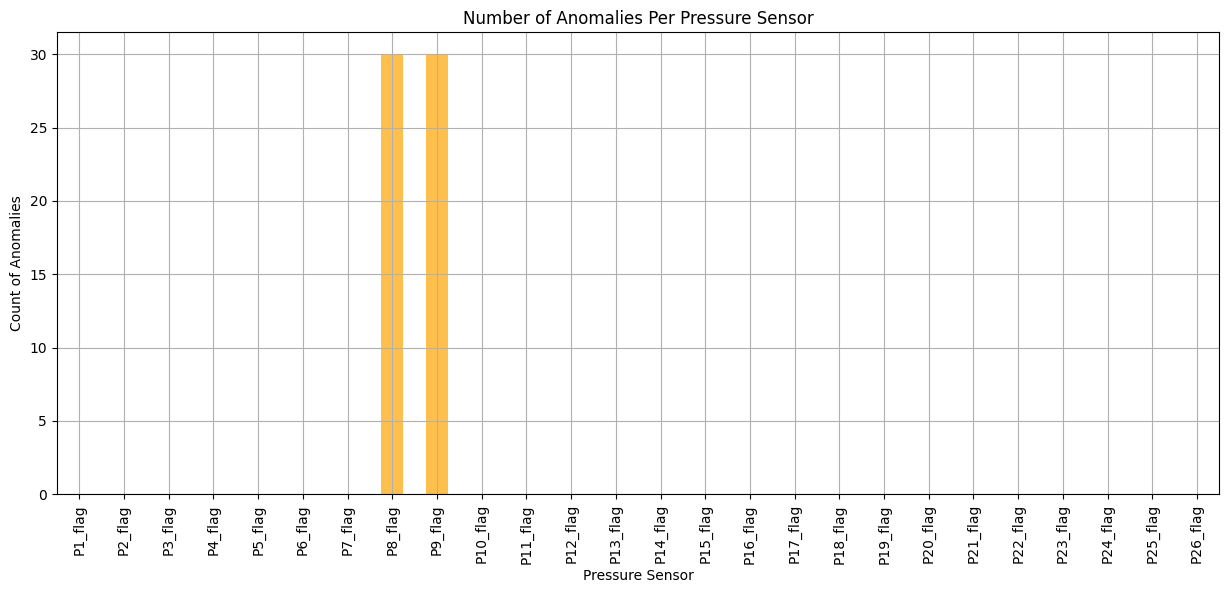

In [350]:
# Check if 'anomaly' is flagged correctly
# Sum all P1_flag to P26_flag columns and compare to 'anomaly'
sensor_flags = train_A.filter(regex='P\d+_flag').astype(bool)
train_A['sensor_flags_sum'] = sensor_flags.sum(axis=1).astype(bool)
anomaly_flag_validation = (train_A['anomaly'] == 1) & (train_A['sensor_flags_sum'] == 0)

# Print validation results
if anomaly_flag_validation.any():
    print("Warning: Some anomalies are flagged incorrectly (anomaly=1, but no sensor flags are set).")
else:
    print("Validation Passed: 'anomaly' flag is set correctly based on sensor flags.")
    
train_A.drop('sensor_flags_sum', axis=1, inplace=True)

# Count anomalies per pressure sensor flag
sensor_anomaly_counts = sensor_flags.sum()

# Plot the counts for each sensor
plt.figure(figsize=(15, 6))
sensor_anomaly_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title("Number of Anomalies Per Pressure Sensor")
plt.xlabel("Pressure Sensor")
plt.ylabel("Count of Anomalies")
plt.grid()
plt.show()

Validation Passed: 'anomaly' flag is set correctly based on sensor flags.


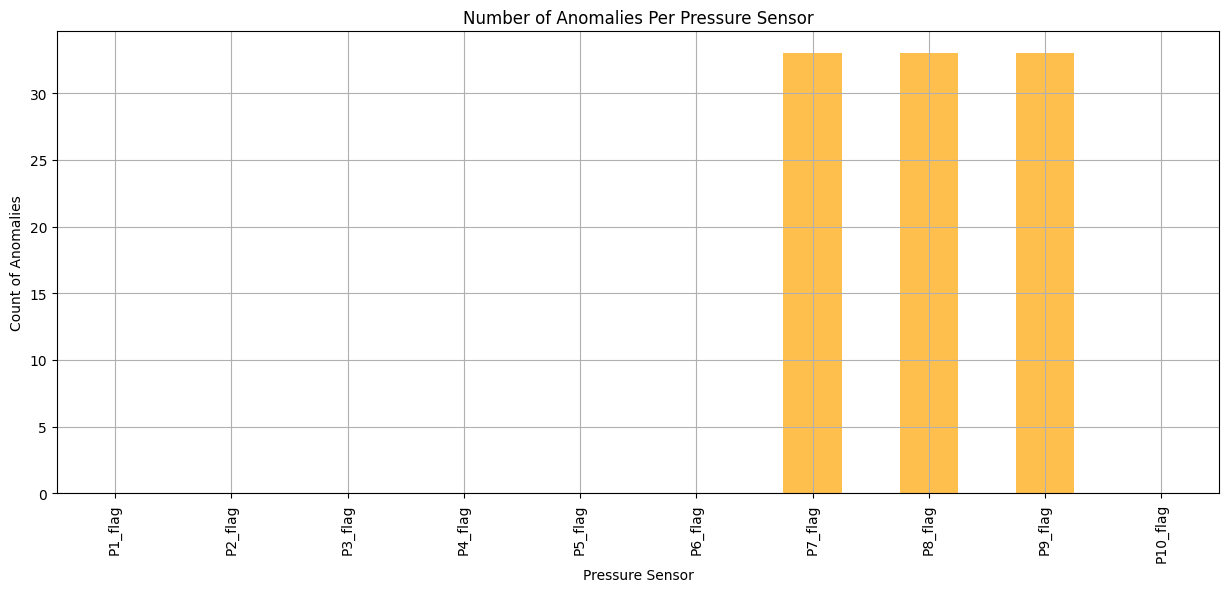

In [351]:
# Check if 'anomaly' is flagged correctly
# Sum all P1_flag to P26_flag columns and compare to 'anomaly'
sensor_flags = train_B.filter(regex='P\d+_flag').astype(bool)
train_B['sensor_flags_sum'] = sensor_flags.sum(axis=1).astype(bool)
anomaly_flag_validation = (train_B['anomaly'] == 1) & (train_B['sensor_flags_sum'] == 0)

# Print validation results
if anomaly_flag_validation.any():
    print("Warning: Some anomalies are flagged incorrectly (anomaly=1, but no sensor flags are set).")
else:
    print("Validation Passed: 'anomaly' flag is set correctly based on sensor flags.")
    
train_B.drop('sensor_flags_sum', axis=1, inplace=True)

# Count anomalies per pressure sensor flag
sensor_anomaly_counts = sensor_flags.sum()

# Plot the counts for each sensor
plt.figure(figsize=(15, 6))
sensor_anomaly_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title("Number of Anomalies Per Pressure Sensor")
plt.xlabel("Pressure Sensor")
plt.ylabel("Count of Anomalies")
plt.grid()
plt.show()

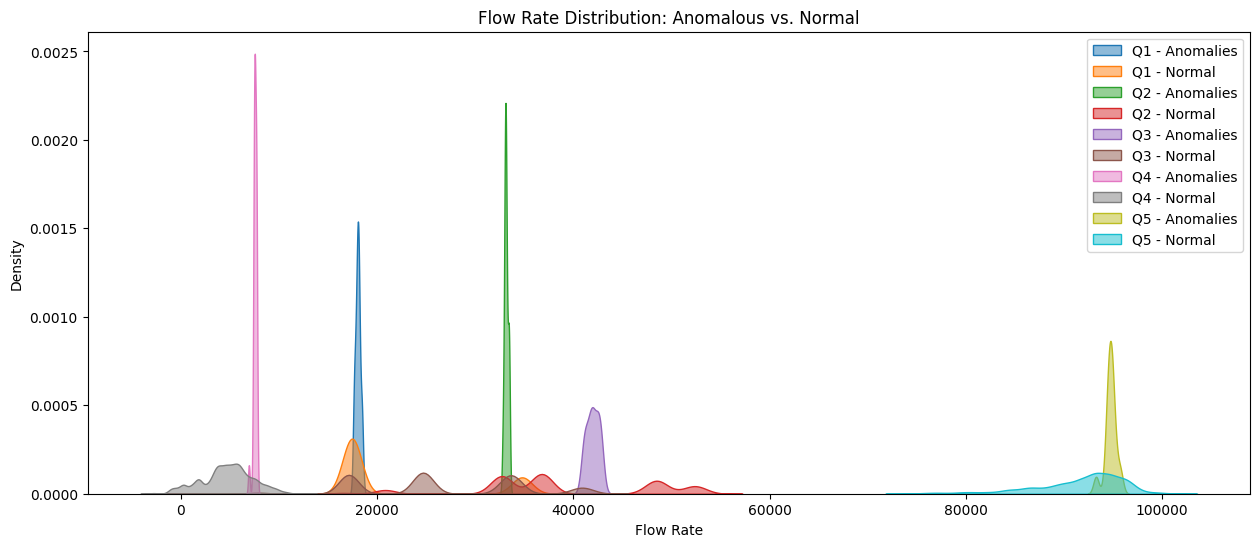

In [352]:
# Compare flow rates during anomalies and normal periods
flow_rate_columns = train_A.filter(regex='^Q').columns.tolist()
flow_anomalies = train_A[train_A['anomaly'] == 1][flow_rate_columns]
flow_normal = train_A[train_A['anomaly'] == 0][flow_rate_columns]

# Plot distribution of flow rates
plt.figure(figsize=(15, 6))
for col in flow_rate_columns:
    sns.kdeplot(flow_anomalies[col], label=f'{col} - Anomalies', fill=True, alpha=0.5)
    sns.kdeplot(flow_normal[col], label=f'{col} - Normal', fill=True, alpha=0.5)
plt.title("Flow Rate Distribution: Anomalous vs. Normal")
plt.xlabel("Flow Rate")
plt.ylabel("Density")
plt.legend()
plt.show()

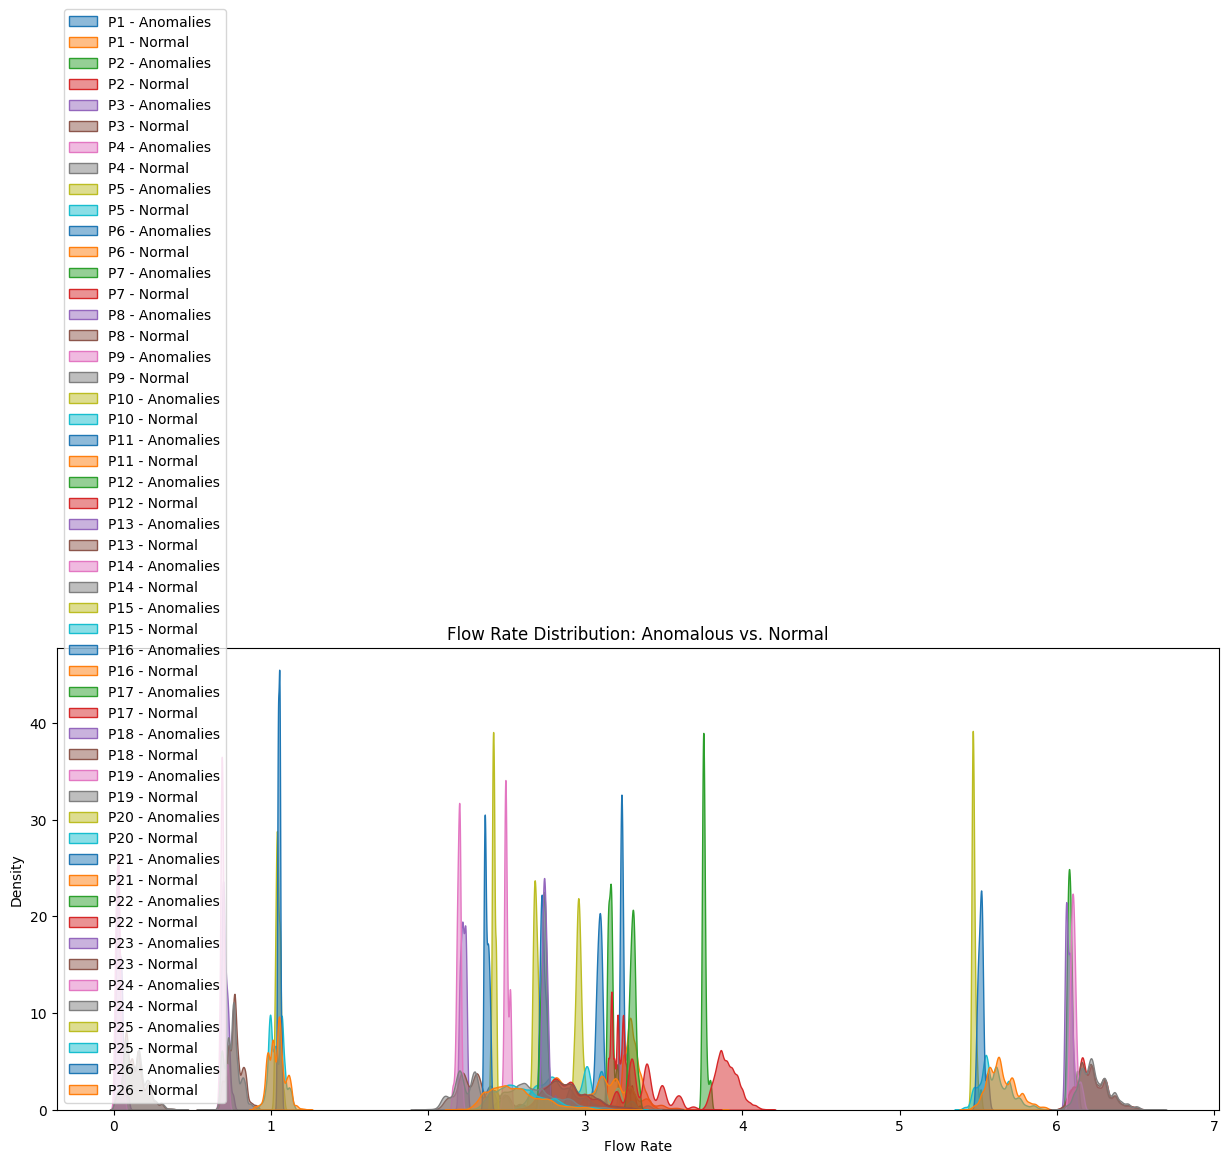

In [356]:
# Compare flow rates during anomalies and normal periods
flow_rate_columns = train_A.filter(regex='^P\d+$').columns.tolist()
flow_anomalies = train_A[train_A['anomaly'] == 1][flow_rate_columns]
flow_normal = train_A[train_A['anomaly'] == 0][flow_rate_columns]

# Plot distribution of flow rates
plt.figure(figsize=(15, 6))
for col in flow_rate_columns:
    sns.kdeplot(flow_anomalies[col], label=f'{col} - Anomalies', fill=True, alpha=0.5)
    sns.kdeplot(flow_normal[col], label=f'{col} - Normal', fill=True, alpha=0.5)
plt.title("Flow Rate Distribution: Anomalous vs. Normal")
plt.xlabel("Flow Rate")
plt.ylabel("Density")
plt.legend()
plt.show()

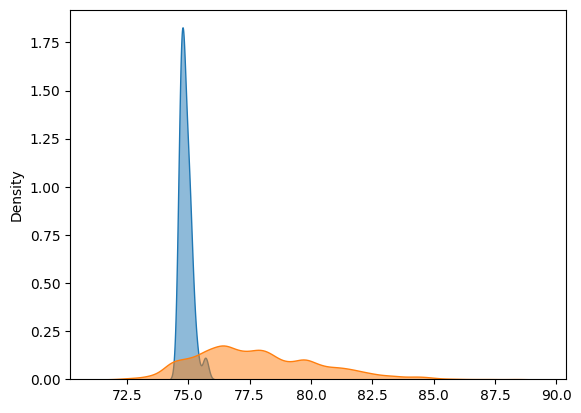

In [360]:
# Compare flow rates during anomalies and normal periods
flow_rate_columns = train_A.filter(regex='^P\d+$').columns.tolist()
flow_anomalies = train_A[train_A['anomaly'] == 1][flow_rate_columns].sum(axis=1)
flow_normal = train_A[train_A['anomaly'] == 0][flow_rate_columns].sum(axis=1)
# print(flow_normal)
sns.kdeplot(flow_anomalies, label=f'Anomalies', fill=True, alpha=0.5)
sns.kdeplot(flow_normal, label=f'Normal', fill=True, alpha=0.5)
plt.show()

In [ ]:
# Compare flow rates during anomalies and normal periods
flow_rate_columns = train_B.filter(regex='^P\d+$').columns.tolist()
flow_anomalies = train_B[train_B['anomaly'] == 1][flow_rate_columns]
flow_normal = train_B[train_B['anomaly'] == 0][flow_rate_columns]

# Plot distribution of flow rates
plt.figure(figsize=(15, 6))
for col in flow_rate_columns:
    sns.kdeplot(flow_anomalies[col], label=f'{col} - Anomalies', fill=True, alpha=0.5, color='red')
    sns.kdeplot(flow_normal[col], label=f'{col} - Normal', fill=True, alpha=0.5)
plt.title("Flow Rate Distribution: Anomalous vs. Normal")
plt.xlabel("Flow Rate")
plt.ylabel("Density")
plt.legend()
plt.show()

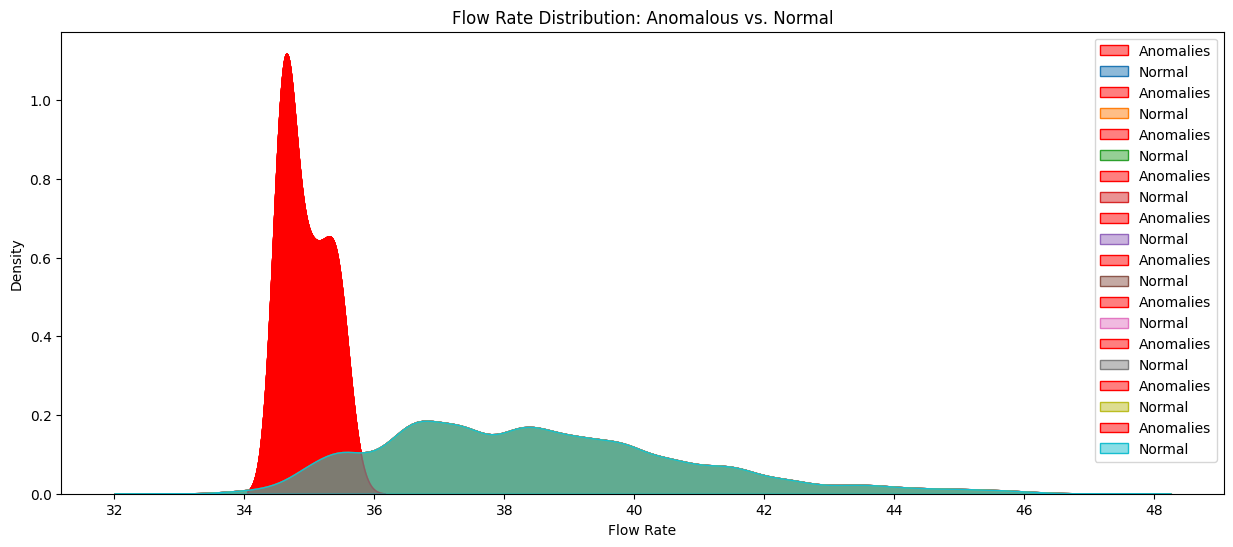

In [365]:
# Compare flow rates during anomalies and normal periods
flow_rate_columns = train_B.filter(regex='^P\d+$').columns.tolist()
flow_anomalies = train_B[train_B['anomaly'] == 1][flow_rate_columns].sum(axis=1)
flow_normal = train_B[train_B['anomaly'] == 0][flow_rate_columns].sum(axis=1)

# Plot distribution of flow rates
plt.figure(figsize=(15, 6))
for col in flow_rate_columns:
    sns.kdeplot(flow_anomalies, label=f'Anomalies', fill=True, alpha=0.5, color='red')
    sns.kdeplot(flow_normal, label=f'Normal', fill=True, alpha=0.5)
plt.title("Flow Rate Distribution: Anomalous vs. Normal")
plt.xlabel("Flow Rate")
plt.ylabel("Density")
plt.legend()
plt.show()

In [242]:
train_A['Q6'] = train_A[['Q1', 'Q2', 'Q3', 'Q4']].sum(axis=1)

In [ ]:
train_A_Q = train_A[['timestamp', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6']]
train_A_Q = train_A_Q.set_index('timestamp')

In [ ]:
import plotly.graph_objects as go

# Create the main figure
fig = go.Figure()

# Add multiple lines for each column in train_A_Q
for column in train_A_Q.columns:
    fig.add_trace(go.Scatter(
        x=train_A_Q.index, 
        y=train_A_Q[column], 
        mode='lines',
        name=column  # 각 열의 이름을 범례로 사용
    ))

# Add vertical lines for anomalies
anomaly_timestamps = train_A[train_A['anomaly'] == 1][['timestamp']]
# for x in anomaly_timestamps:
fig.add_vrect(
    x0=str(anomaly_timestamps.iloc[0]['timestamp']), x1=str(anomaly_timestamps.iloc[-1]['timestamp']),
    fillcolor='red',
    opacity=0.5
)

# Update layout for better visualization
fig.update_layout(
    title="Time Series with Anomalies Highlighted",
    xaxis_title="Timestamp",
    yaxis_title="Value",
    width=900, height=500,
    template="plotly_white",
    showlegend=True
)

# Show the figure
fig.show()


In [245]:
train_A_P = train_A[['timestamp'] + train_A.filter(regex='^P\d+$').columns.to_list()]
train_A_P = train_A_P.set_index('timestamp')

In [ ]:
import plotly.graph_objects as go

# Create the main figure
fig = go.Figure()

for column in train_A_P.columns:
    fig.add_trace(go.Scatter(
        x=train_A_P.index, 
        y=train_A_P[column], 
        mode='lines',
        name=column  # 각 열의 이름을 범례로 사용
    ))

# Add vertical lines for anomalies
anomaly_timestamps = train_A[train_A['anomaly'] == 1][['timestamp']]
# for x in anomaly_timestamps:
fig.add_vrect(
    x0=str(anomaly_timestamps.iloc[0]['timestamp']), x1=str(anomaly_timestamps.iloc[-1]['timestamp']),
    fillcolor='red',
    opacity=0.5
)

# Update layout for better visualization
fig.update_layout(
    title="Time Series with Anomalies Highlighted",
    xaxis_title="Timestamp",
    yaxis_title="Value",
    width=900, height=500,
    template="plotly_white",
    showlegend=True
)

# Show the figure
fig.show()


In [247]:
train_B['Q5'] = train_B[['Q2', 'Q3', 'Q4']].sum(axis=1)

In [250]:
train_B_Q = train_B[['timestamp'] + train_B.filter(regex='^Q\d+$').columns.to_list()]
train_B_Q = train_B_Q.set_index('timestamp')

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

for column in train_B_Q.columns:
    fig.add_trace(go.Scatter(
        x=train_B_Q.index, 
        y=train_B_Q[column], 
        mode='lines',
        name=column
    ))

anomaly_timestamps = train_B[train_B['anomaly'] == 1][['timestamp']]
fig.add_vrect(
    x0=str(anomaly_timestamps.iloc[0]['timestamp']), x1=str(anomaly_timestamps.iloc[-1]['timestamp']),
    fillcolor='red',
    opacity=0.5
)

fig.update_layout(
    title="Time Series with Anomalies Highlighted",
    xaxis_title="Timestamp",
    yaxis_title="Value",
    width=900, height=500,
    template="plotly_white",
    showlegend=True
)

# Show the figure
fig.show()


In [ ]:
train_B_P = train_B[['timestamp'] + train_B.filter(regex='^P\d+$').columns.to_list()]
train_B_P = train_B_P.set_index('timestamp')

In [ ]:
train_B_M = train_B[['timestamp'] + train_B.filter(regex='^M\d+$').columns.to_list()]
train_B_M['timestamp'] = pd.to_datetime(train_B_M['timestamp'], format='%y/%m/%d %H:%M')
train_B_M = train_B_M.set_index('timestamp')

In [ ]:
train_B_M

In [ ]:
import plotly.graph_objects as go

# Create the main figure
fig = go.Figure()

for column in train_B_P.columns:
    fig.add_trace(go.Scatter(
        x=train_B_P.index, 
        y=train_B_P[column], 
        mode='lines',
        name=column  # 각 열의 이름을 범례로 사용
    ))

# Add vertical lines for anomalies
anomaly_timestamps = train_B[train_B['anomaly'] == 1][['timestamp']]
# for x in anomaly_timestamps:
fig.add_vrect(
    x0=str(anomaly_timestamps.iloc[0]['timestamp']), x1=str(anomaly_timestamps.iloc[-1]['timestamp']),
    fillcolor='red',
    opacity=0.5
)

# Update layout for better visualization
fig.update_layout(
    title="Time Series with Anomalies Highlighted",
    xaxis_title="Timestamp",
    yaxis_title="Value",
    width=900, height=500,
    template="plotly_white",
    showlegend=True
)

# Show the figure
fig.show()


In [ ]:
# Extract hour from timestamp
train_A['hour'] = train_A['timestamp'].dt.hour

# Group by hour and calculate anomaly rate
hourly_anomalies = train_A.groupby('hour')['anomaly'].mean()

# Plot anomaly rate by hour
plt.figure(figsize=(10, 5))
hourly_anomalies.plot(kind="bar", color="orange", alpha=0.7)
plt.title("Anomaly Rate by Hour of Day")
plt.xlabel("Hour of Day")
plt.ylabel("Anomaly Rate")
plt.grid()
plt.show()